# 0. Setting 

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec # Alignments 
'''
girdspec : 전체 figure를 grid로 한 번에 넘겨주는 것..? 
'''

import seaborn as sns 
print(f'Matplotlib Version : {mpl.__version__}')
print(f'Seaborn Version : {sns.__version__}')




Matplotlib Version : 3.3.3
Seaborn Version : 0.11.1


*dpi가 무엇인가?*

1) 고해상도 그래프 그리기 
- matplotlib.pyplot.figure()에서 dpi를 높은 값으로 설정하면 고해상도 그림 그릴 수 있음 
- dpi란? 인치당 도트 수 = 인치당 픽셀 수 
- 기본값 : 100 
- dpi를 늘리면 그림이 확대되어서 잘릴 수 있음 

2) 고해상도 그래프 저장하기 
- matplotlib.pyplot.savefig()에서 dpi를 높은 값으로 설정하면 고해상도 그림 저장할 수 있음 


In [6]:
plt.rcParams['figure.dpi'] = 200

# 1. Alignments 

- `subplots`
- `subplot2grid`
- `add_axes`
- `gridspec, add_subplot`
- `inset_axes`
- `make_axes_locatable`

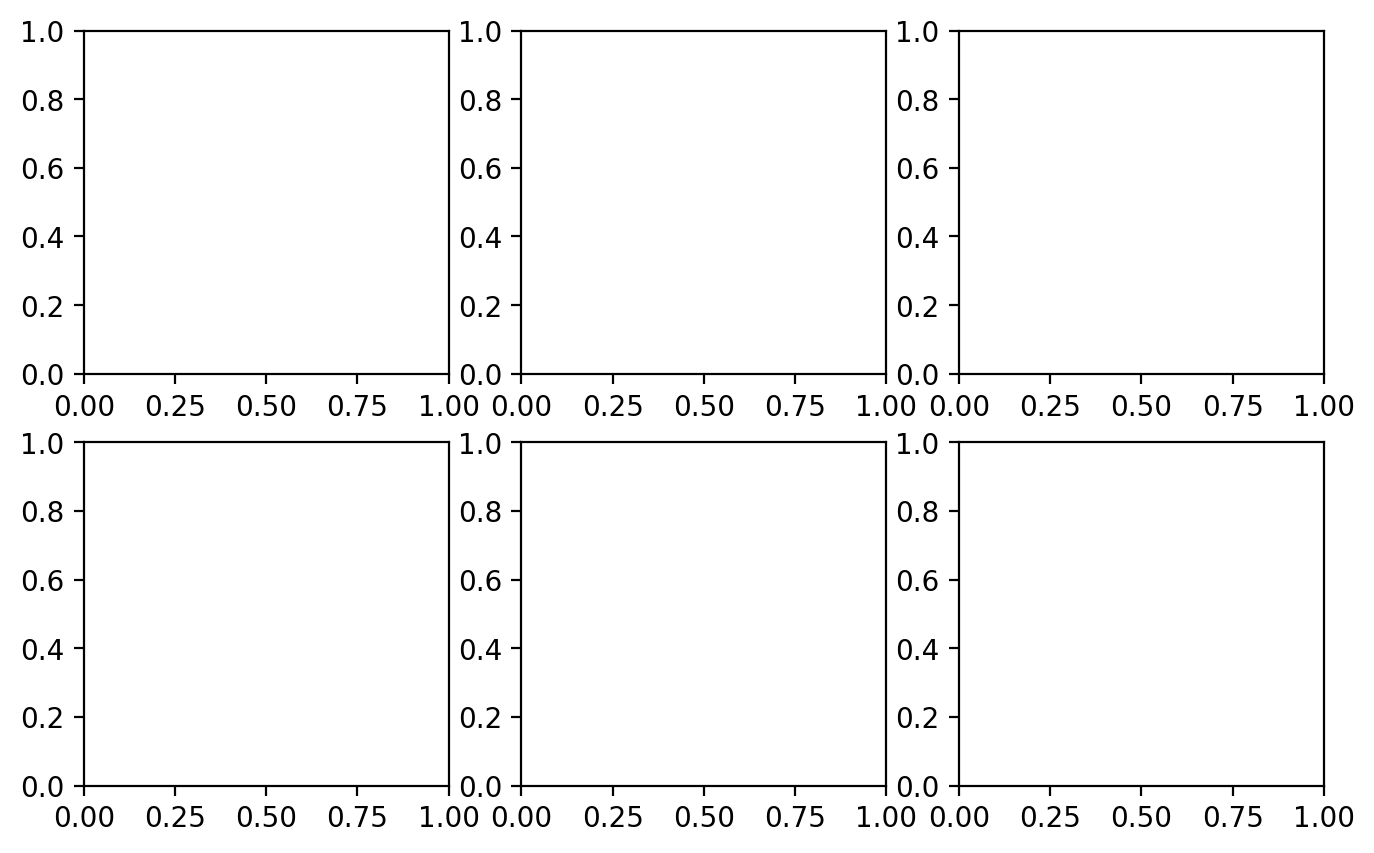

In [7]:
# subplots 
fig, axes = plt.subplots(2,3, figsize = (8,5))
plt.show()

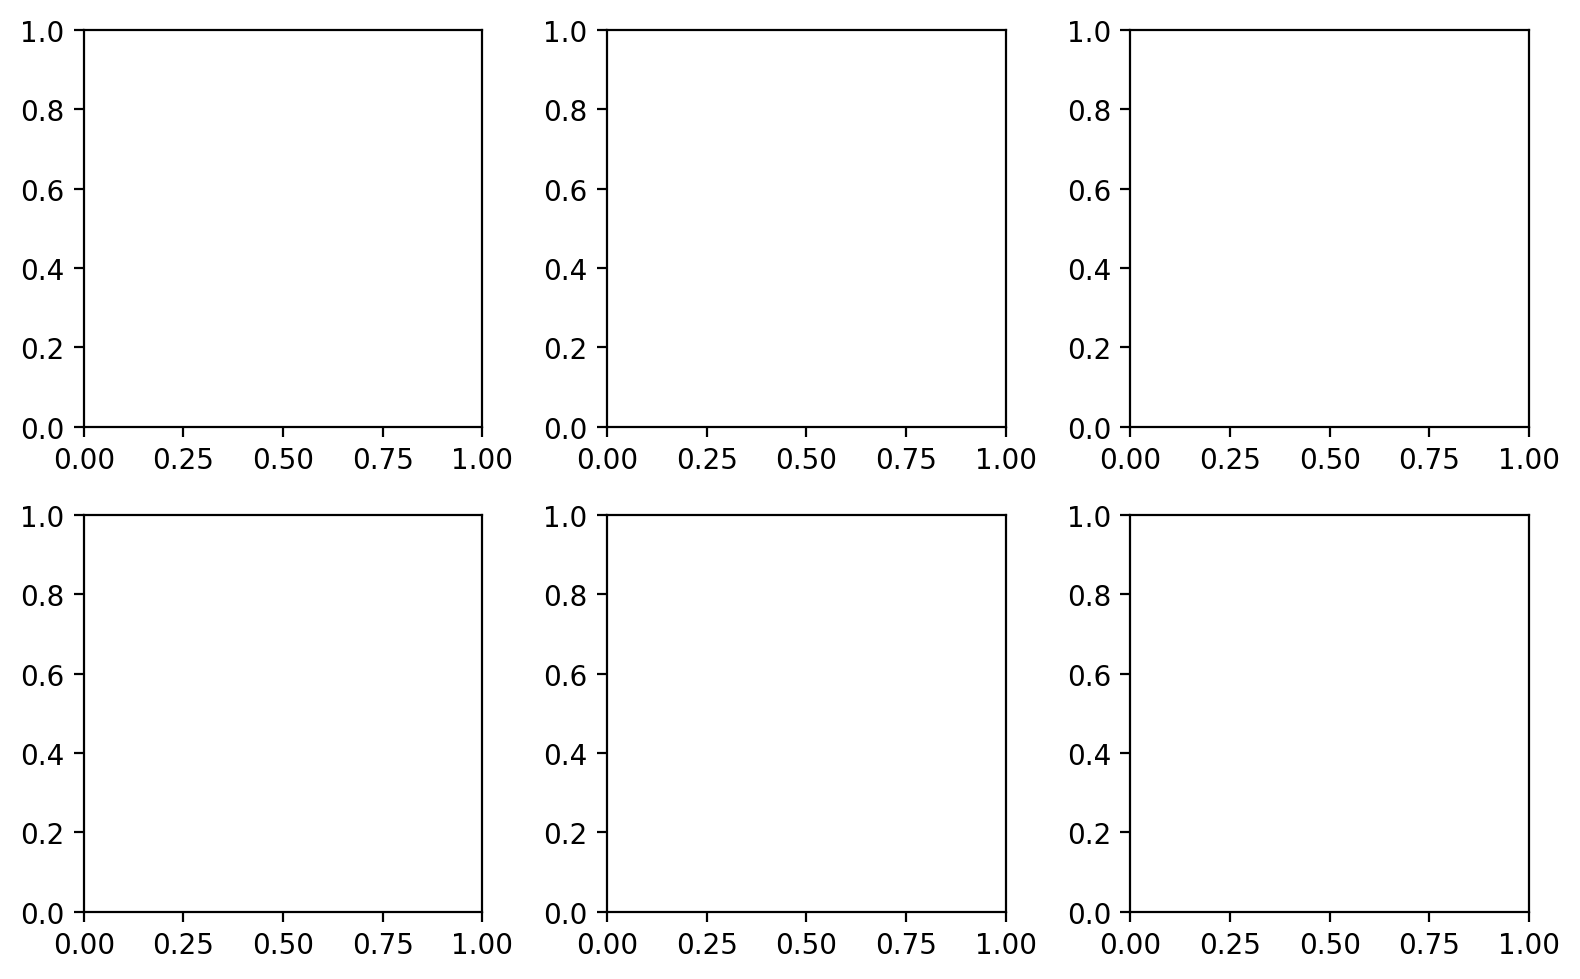

In [9]:
fig, axes = plt.subplots(2,3, figsize = (8,5))
plt.tight_layout() # plot끼리 살짝 거리 두기 
plt.show()

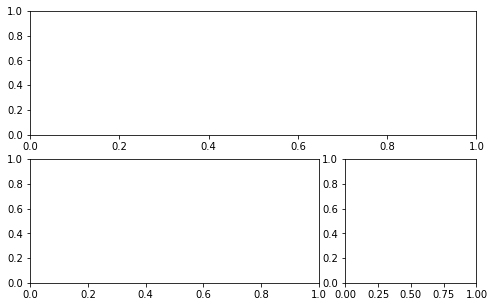

In [13]:
# subplot2grid
fig = plt.figure(figsize = (8,5))

ax = [None for _ in range(6)]

ax[0] = plt.subplot2grid((2,3), (0,0), colspan = 4) # 3개의 행과 4개의 여로 이루어진 figure라는 의미, colspan은 가로 길이인듯 
ax[1] = plt.subplot2grid((2,3), (1,0), colspan = 2) 
ax[2] = plt.subplot2grid((2,3), (1,2), colspan = 1) 

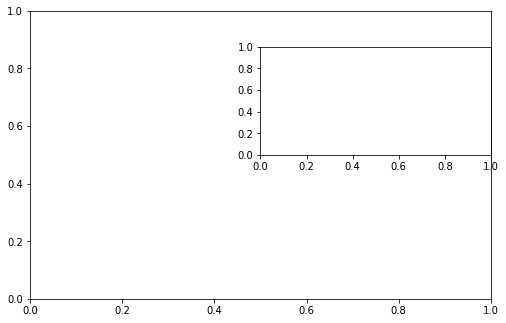

In [25]:
# add_axes
fig = plt.figure(figsize=(8, 5))

ax = [None for _ in range(3)]


ax[0] = fig.add_axes([0.1,0.1,0.8,0.8]) # x축의 시작위치, y축의 시작위치, x축의 길이, y축의 길이
ax[0] = fig.add_axes([0.5,0.5,0.4,0.3]) # x, y, dx, dy

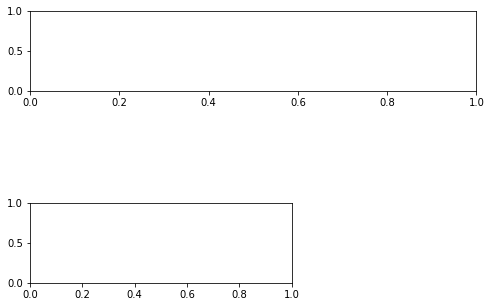

In [28]:
# add_gridspec

fig = plt.figure(figsize=(8,5))

gs = fig.add_gridspec(3,5) # 3X3 grid 생성 

ax = [None for _ in range(2)]

ax[0] = fig.add_subplot(gs[0, :])
ax[1] = fig.add_subplot(gs[2, 0:3])

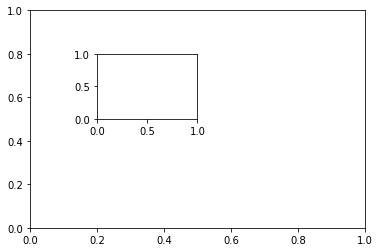

In [31]:
# inset_axes : 추가로 데이터를 표현하기 위해 삽입한 작은 그래프 
fig, ax = plt.subplots()
axin = ax.inset_axes([0.2, 0.5, 0.3, 0.3]) # x0, y0, width, height
plt.show()

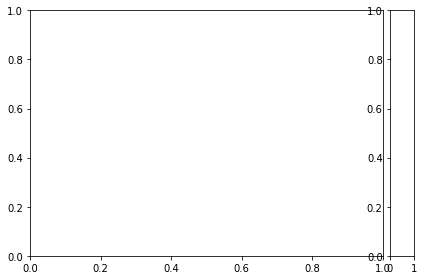

In [37]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(1,1)

ax_divider = make_axes_locatable(ax)

ax = ax_divider.append_axes('right', size = "7%", pad = "2%")

plt.tight_layout()
plt.show()


# 01. Netflix Movie Data

- type : TV show, Movie
- title : 제목 
- director : 감독 
- cast : 캐스팅 목록 
- country : 국가 
- date_added : 추가된 날짜 
- release_year : 배포된 연도 
- rating : 영상물 등급 
- duration : 방영 시간 
- listed_in : 포함된 장르 
- description : 설명 

In [39]:
# 데이터 불러오기 
df_netflix = pd.read_csv("./data/netflix_titles.csv")
df_netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [41]:
# 컬럼 확인 
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## 1-1. Understanding what content is available in different countries 

In [50]:
len(df_netflix['country'].unique()) # 682개국의 나라에서 컨텐츠를 생산했음 

682

- movie 개수 상위 10개 나라 시각화

In [58]:
df_movie = df_netflix[df_netflix['type']=='Movie']
movie_country = df_movie['country'].value_counts()[:10]

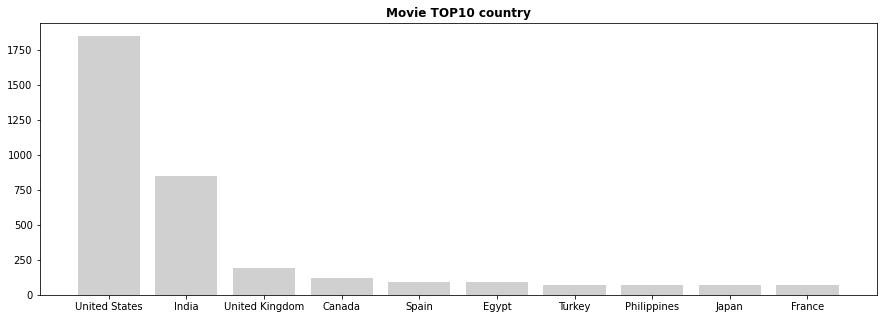

In [67]:
fig, ax= plt.subplots(1,1,figsize = (15,5))

ax.bar(movie_country.index, movie_country, color="#d0d0d0")
ax.set_title(f'Movie TOP10 country', fontweight='bold')

plt.show()

- TV show 개수 상위 10개 나라 시각화

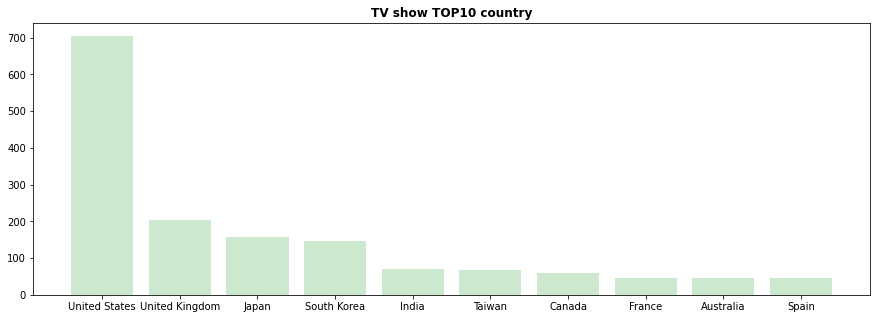

In [66]:
df_tv = df_netflix[df_netflix['type']=='TV Show']
tv_country = df_tv['country'].value_counts()[:10]

fig, ax= plt.subplots(1,1,figsize = (15,5))

ax.bar(tv_country.index, tv_country, color="#CCE9D0")
ax.set_title(f'TV show TOP10 country', fontweight='bold')

plt.show()

영화와 달리, TV show에서는 아시아 국가들이 많이 올라온 것을 볼 수 있다. 

- 1위 국가 : 미국 
- 미국의 영화 및 TV show 등급 분포 시각화 

In [82]:
df_usa = df_movie[df_movie['country']=='United States']
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
usa_rating_movie = df_usa['rating'].value_counts()[rating_order] # 뒤에 리스트 추가로 해당 순서대로 배열 생성됨 

usa_rating_movie


G            29
TV-Y         38
TV-G         41
PG          144
TV-Y7        42
TV-Y7-FV      1
TV-PG       143
PG-13       227
TV-14       200
R           364
NC-17         1
TV-MA       583
Name: rating, dtype: int64

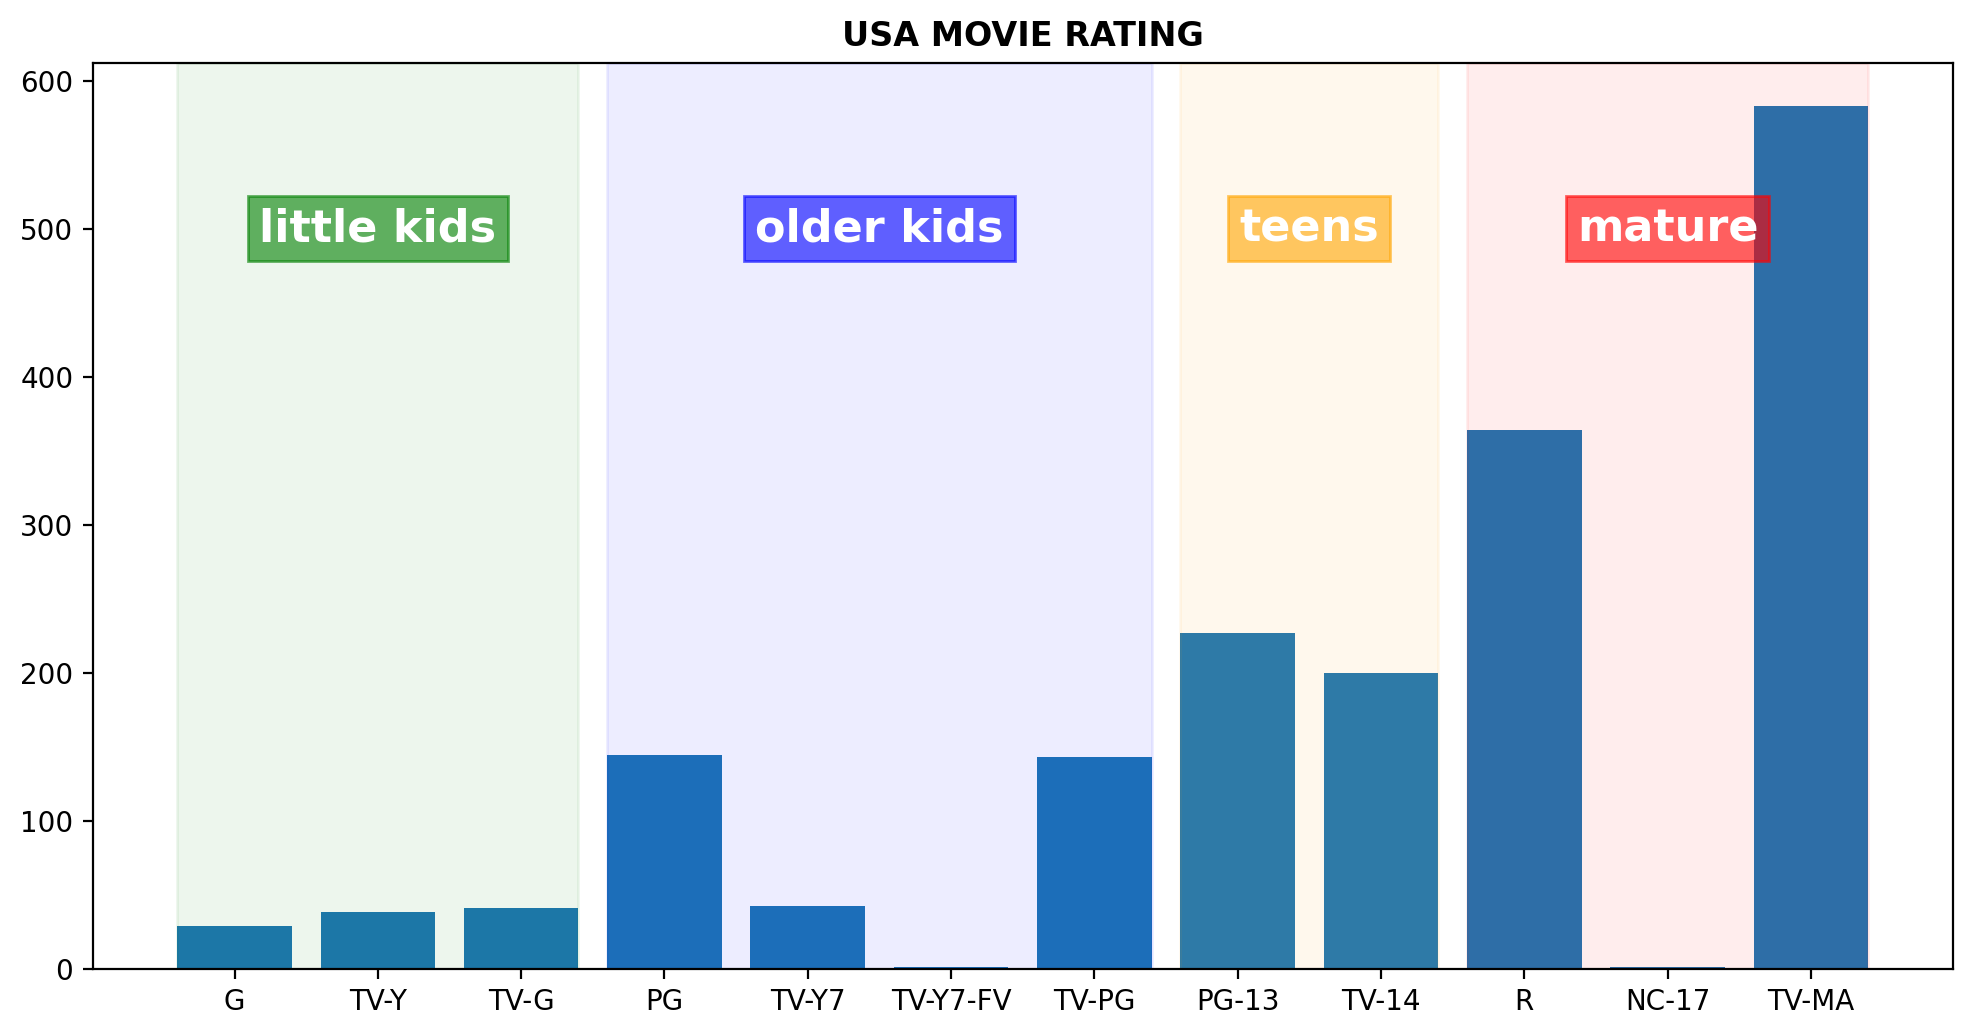

In [84]:
fig, ax = plt.subplots(1,1,figsize = (12,6), dpi = 200)
ax.bar(usa_rating_movie.index, usa_rating_movie)
ax.set_title("USA MOVIE RATING", fontweight = "bold")

# 등급 구간 색 넣기 

color = ['green', 'blue', 'orange', 'red']

span_range = [[0,2], [3,6], [7,8], [9,11]]

for idx, sub_title in enumerate(['little kids', 'older kids', 'teens', 'mature']) : 
    # 주석달기 
    ax.annotate(sub_title,
                xy=(sum(span_range[idx])/2, 500), textcoords = 'offset points', # offset points는 xy(좌표측의 값)부터 xytext offset 위치(단위 point)에 출력
                xytext = (0,0), va = "center", ha="center", color = "w", fontsize=16, fontweight = "bold",
                bbox = dict(color = color[idx], alpha = 0.6)) #alpha는 투명도 

    ax.axvspan(span_range[idx][0]-0.4, span_range[idx][1]+0.4, color = color[idx], alpha = 0.07)
plt.show()

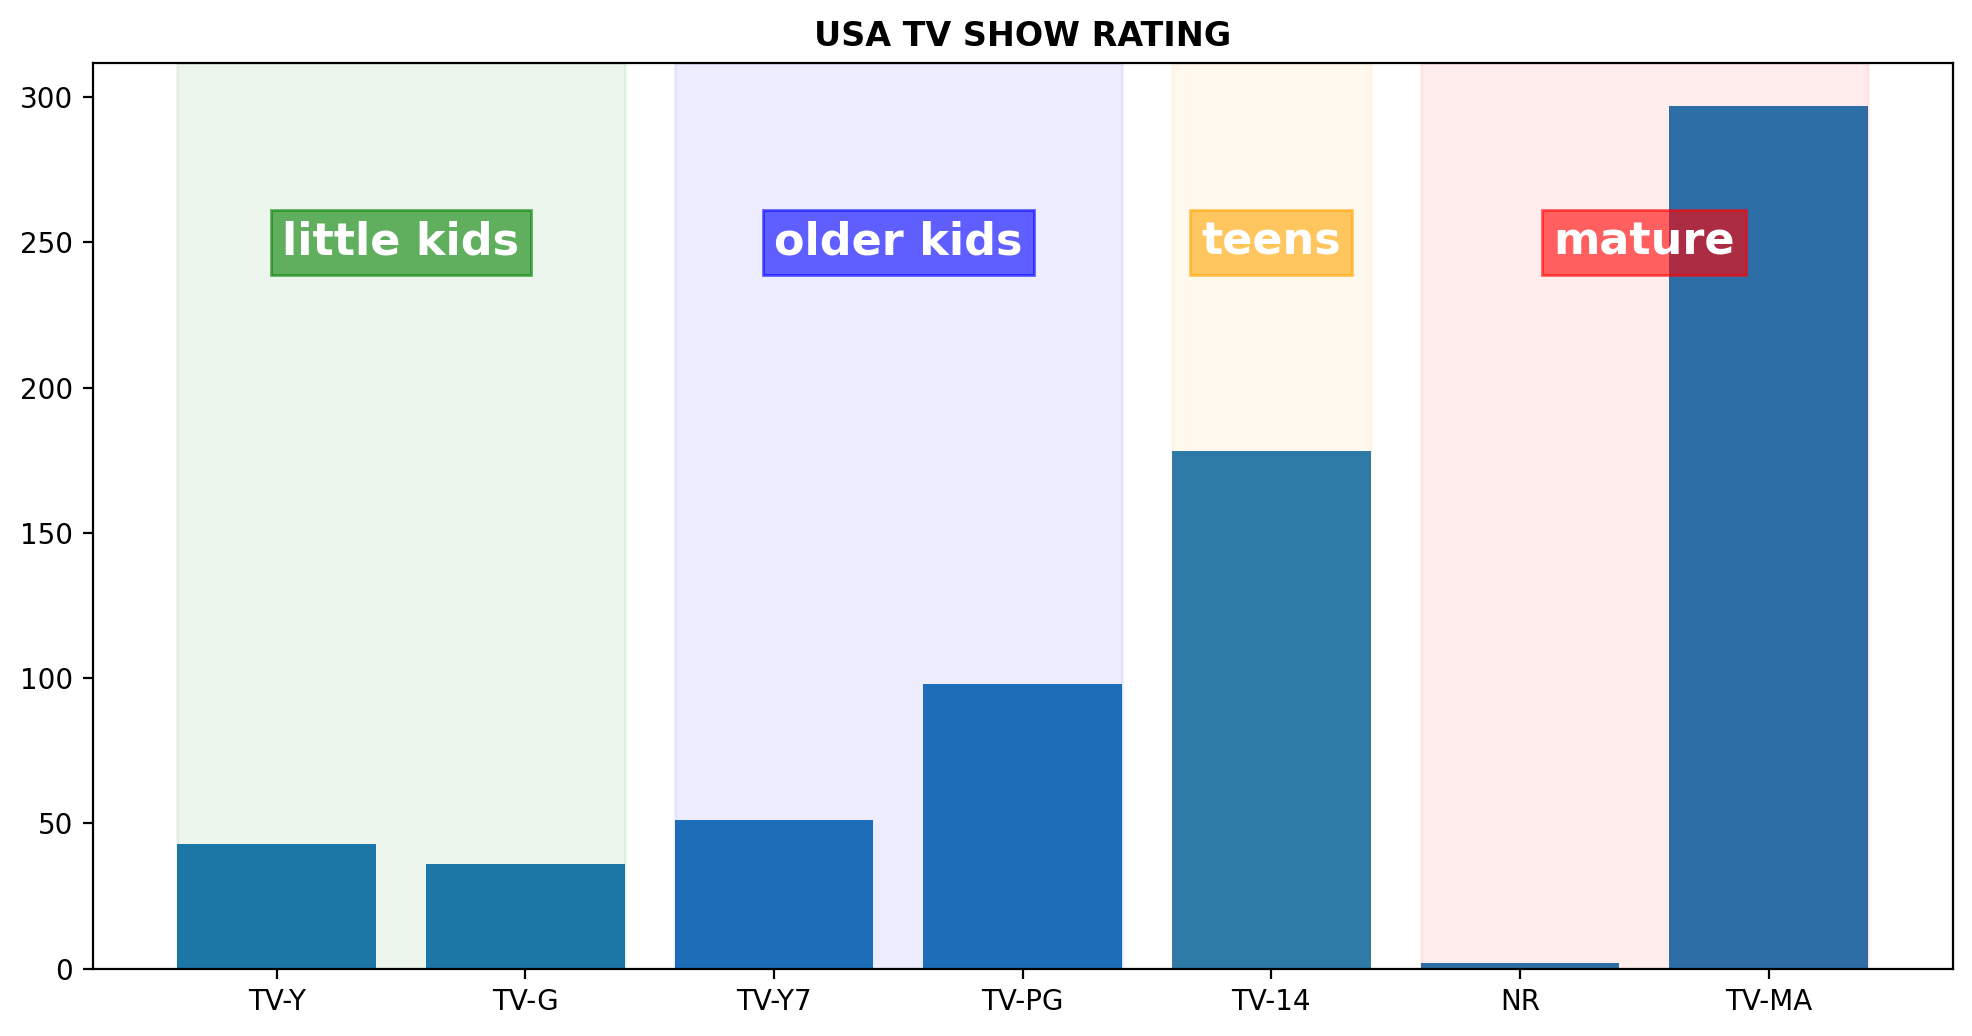

In [94]:
df_usa = df_tv[df_tv['country']=='United States']
rating_order = ['TV-Y', 'TV-G', 'TV-Y7', 'TV-PG', 'TV-14', 'NR', 'TV-MA']
usa_rating_tv = df_usa['rating'].value_counts()[rating_order]


fig, ax = plt.subplots(1,1,figsize = (12,6), dpi = 200)
ax.bar(usa_rating_tv.index, usa_rating_tv)
ax.set_title("USA TV SHOW RATING", fontweight = "bold")

# 등급 구간 색 넣기 

color = ['green', 'blue', 'orange', 'red']

span_range = [[0,1], [2,3], [4,4], [5,6]]

for idx, sub_title in enumerate(['little kids', 'older kids', 'teens', 'mature']) : 
    # 주석달기 
    ax.annotate(sub_title,
                xy=(sum(span_range[idx])/2, 250), textcoords = 'offset points', # offset points는 xy(좌표측의 값)부터 xytext offset 위치(단위 point)에 출력
                xytext = (0,0), va = "center", ha="center", color = "w", fontsize=16, fontweight = "bold",
                bbox = dict(color = color[idx], alpha = 0.6)) #alpha는 투명도 

    ax.axvspan(span_range[idx][0]-0.4, span_range[idx][1]+0.4, color = color[idx], alpha = 0.07)
plt.show()